# Assignment 1:The Sparks Foundation Data Science and Business Analytics Internship



Name : Rahul Vanjeri

Intership batch: June 2021

**Predicting a Student's score based on hours of study**

Import necessary libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Load the dataset
df = pd.read_excel('/content/student_score.xlsx')

**EDA**

In [2]:
df

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

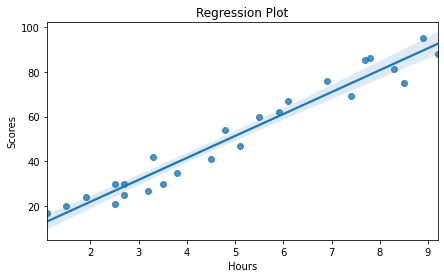

In [3]:
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='Hours', y = 'Scores')
plt.title('Regression Plot')
plt.show()

Strong linear relationship is seen between feature and target

Split the data

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(df['Hours'],df['Scores'], train_size = 0.2,random_state = 1)

In [5]:
LR = LinearRegression()
LR.fit(xtrain.values.reshape(-1, 1), ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
yp = LR.predict(xtest.values.reshape(-1, 1))
print('R2 score: {:.2f}'.format(r2_score(ytest,yp)))
print('mean squared error score: {:.2f}'.format(mean_squared_error(ytest,yp)))
print('mean absolute error score: {:.2f}'.format(mean_absolute_error(ytest,yp)))

R2 score: 0.94
mean squared error score: 37.38
mean absolute error score: 5.64


94% of the variance in the data is explained by the model

Analyse model weights and bias to get insight

In [7]:
LR.coef_, LR.intercept_

(array([9.48266219]), 2.3694071588366867)

Based on the observed information the model predicts that score is proportional to 9.48.. multipled by no. of hours of study

Also, for an individual who pts in 0 hours of study gets a minimum of 2.36 marks

Now that its known that the model does a good job, train it on the entire dataset and predict for 9.25 hours of study


In [11]:
LR.fit(df['Hours'].values.reshape(-1,1),df['Scores'])
yp =LR.predict(np.array(9.25).reshape(-1,1))
print('for 9.25 hours of study predicted score is: {}'.format(yp[0]))

for 9.25 hours of study predicted score is: 92.9098547701573
